In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
#ignorar os avisos do python
warnings.filterwarnings('ignore')

# alterando o tamanho das figuras
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (16,9)

In [103]:
url = "https://github.com/alura-cursos/Prophet_covid/raw/main/dados_covid_sp.zip"
df = pd.read_csv(url, compression='zip', sep = ';')
df['datahora'] = pd.to_datetime(df['datahora'], format = "%Y-%m-%d")
df_sp = df.query("nome_munic == 'São Paulo'")

In [104]:
prophet = pd.DataFrame()
prophet['ds'] = df_sp['datahora']
prophet['y'] = df_sp['casos_novos']

In [105]:
#import Prophet
from fbprophet import Prophet

In [106]:
modelo = Prophet()

In [107]:
modelo.fit(prophet)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [108]:
futuro = modelo.make_future_dataframe(periods=30)

In [109]:
previsao = modelo.predict(futuro)

In [110]:
previsao.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-02-25,-119.052217,-786.211865,1576.488784,-119.052217,-119.052217,500.712817,500.712817,500.712817,500.712817,500.712817,500.712817,0.0,0.0,0.0,381.660600
1,2020-02-26,-101.733359,-772.127166,1655.274126,-101.733359,-101.733359,555.369016,555.369016,555.369016,555.369016,555.369016,555.369016,0.0,0.0,0.0,453.635657
2,2020-02-27,-84.414501,-629.563155,1830.550813,-84.414501,-84.414501,650.415890,650.415890,650.415890,650.415890,650.415890,650.415890,0.0,0.0,0.0,566.001389
3,2020-02-28,-67.095643,-882.299560,1516.474427,-67.095643,-67.095643,368.220574,368.220574,368.220574,368.220574,368.220574,368.220574,0.0,0.0,0.0,301.124931
4,2020-02-29,-49.776785,-1272.012635,1085.330513,-49.776785,-49.776785,30.668336,30.668336,30.668336,30.668336,30.668336,30.668336,0.0,0.0,0.0,-19.108449


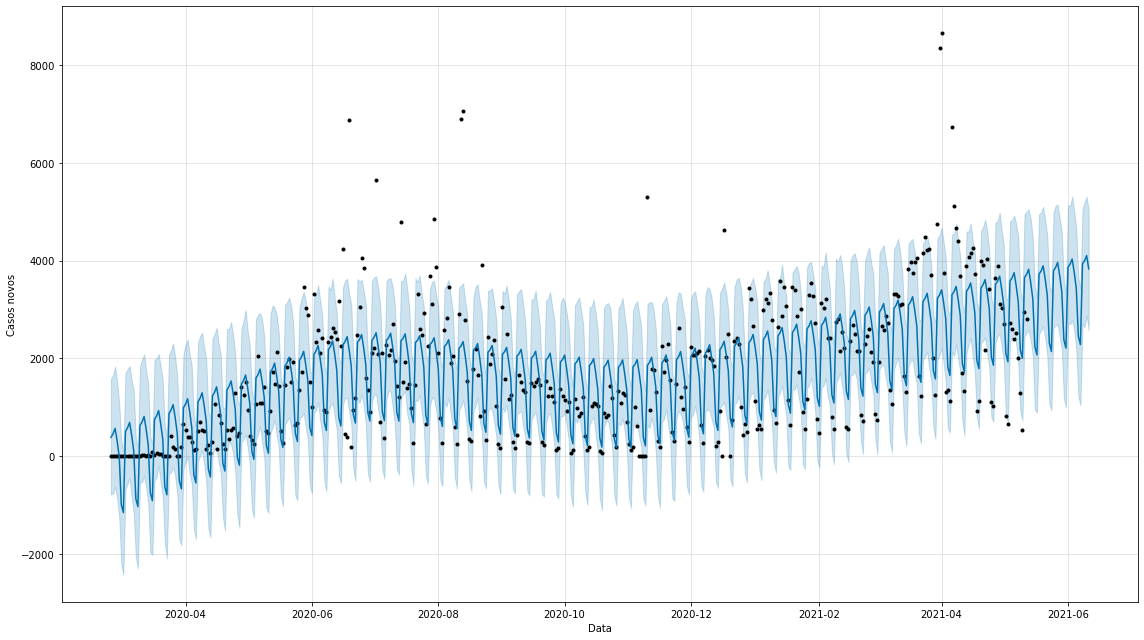

In [111]:
modelo.plot(previsao,xlabel = 'Data', ylabel = 'Casos novos', figsize=(16,9));

# Separação em dados de treino e dados de teste

In [112]:
df_sp.shape

(443, 26)

Serão utilizado os 400 primeiros dados para treinar o modelo e os ultimos dados para testá-lo

In [113]:
profeta = pd.DataFrame()
profeta['ds'] = df_sp['datahora'][:400]
profeta['y'] = df_sp['casos_novos'][:400]

In [114]:
modelo = Prophet()
modelo.fit(profeta)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [115]:
previsto = modelo.make_future_dataframe(periods=43)
previsto = modelo.predict(previsto)
previsto.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-02-25,-149.825882,-755.678456,1334.017795,-149.825882,-149.825882,457.898870,457.898870,457.898870,457.898870,457.898870,457.898870,0.0,0.0,0.0,308.072988
1,2020-02-26,-131.885705,-712.522189,1375.728750,-131.885705,-131.885705,456.975129,456.975129,456.975129,456.975129,456.975129,456.975129,0.0,0.0,0.0,325.089424
2,2020-02-27,-113.945527,-586.109598,1512.335203,-113.945527,-113.945527,596.202571,596.202571,596.202571,596.202571,596.202571,596.202571,0.0,0.0,0.0,482.257043
3,2020-02-28,-96.005350,-862.705028,1262.522004,-96.005350,-96.005350,340.836568,340.836568,340.836568,340.836568,340.836568,340.836568,0.0,0.0,0.0,244.831218
4,2020-02-29,-78.065173,-1103.889826,1045.860733,-78.065173,-78.065173,59.096534,59.096534,59.096534,59.096534,59.096534,59.096534,0.0,0.0,0.0,-18.968639


In [116]:
df_teste = pd.DataFrame()
df_teste['ds'] = df_sp['datahora'][400:]
df_teste['y'] = df_sp['casos_novos'][400:]

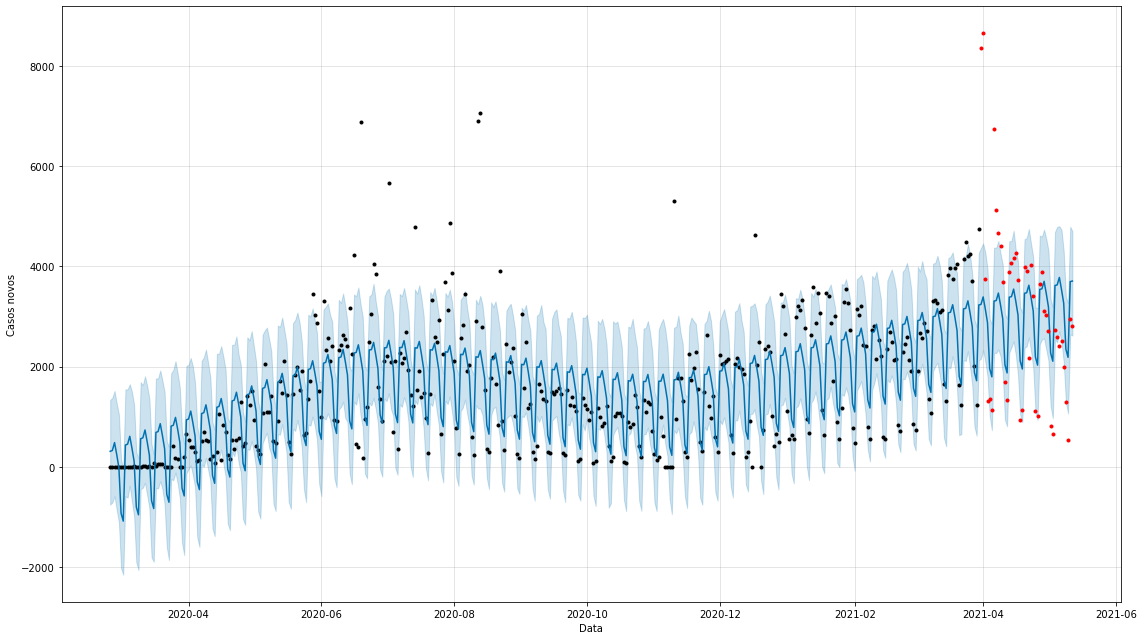

In [117]:
modelo.plot(previsto,xlabel = 'Data', ylabel = 'Casos novos', figsize=(16,9));
plt.plot(df_teste['ds'],df_teste['y'],'.r')

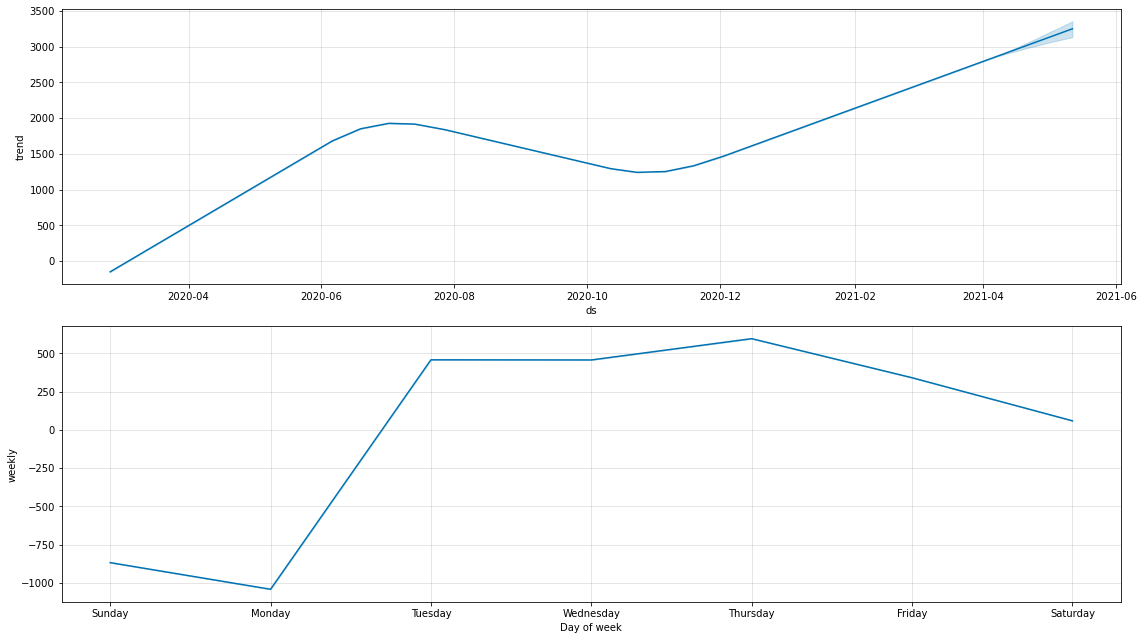

In [118]:
modelo.plot_components(previsto,figsize=(16,9));

In [119]:
from fbprophet.plot import add_changepoints_to_plot

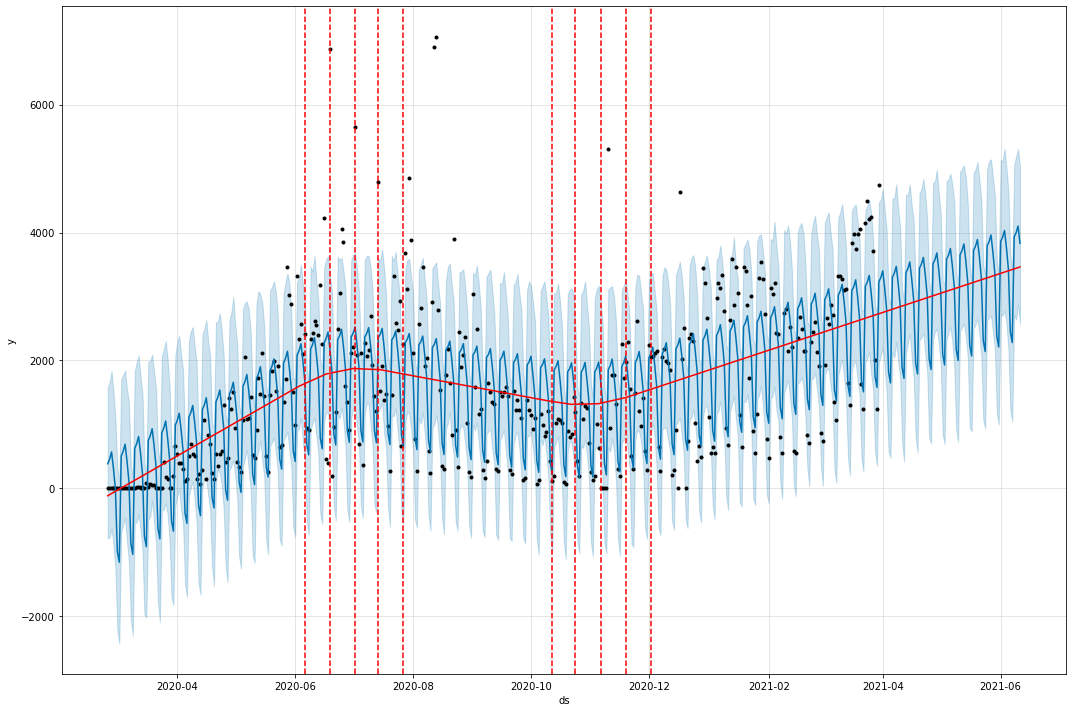

In [120]:
fig = modelo.plot(previsao, figsize=(15,10))
a = add_changepoints_to_plot(fig.gca(),modelo, previsao)

In [121]:
# Preparando os dados
profeta = pd.DataFrame()
profeta['ds'] = df_sp['datahora'][:400]
profeta['y'] = df_sp['casos_novos'][:400]

df_teste = pd.DataFrame()
df_teste['ds'] = df_sp['datahora'][400:]
df_teste['y'] = df_sp['casos_novos'][400:]

In [122]:
# Criando e treinando o modelo
modelo = Prophet(n_changepoints=50)
modelo.fit(profeta)

# Fazendo as previsões
previsto = modelo.make_future_dataframe(periods=43)
previsto = modelo.predict(previsto)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


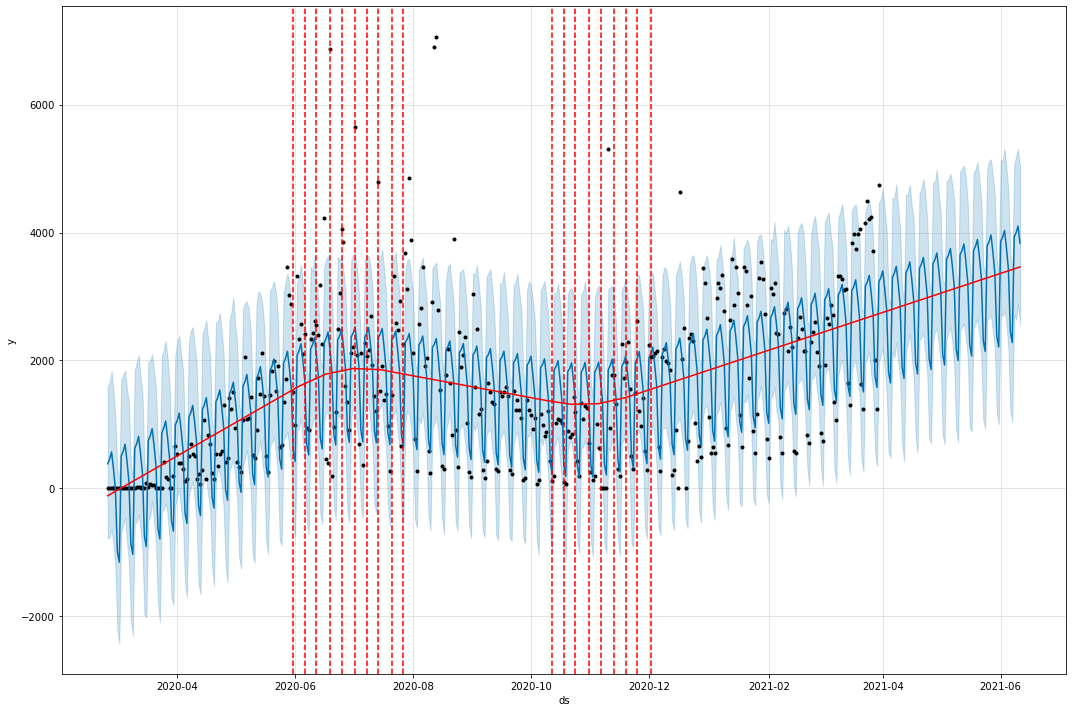

In [123]:
# Plot
fig = modelo.plot(previsao, figsize=(15,10))
a = add_changepoints_to_plot(fig.gca(),modelo, previsao)

In [124]:
# Criando e treinando o modelo
modelo = Prophet(n_changepoints=50, changepoint_prior_scale = 5)
modelo.fit(profeta)

# Fazendo as previsões
previsto = modelo.make_future_dataframe(periods=43)
previsto = modelo.predict(previsto)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


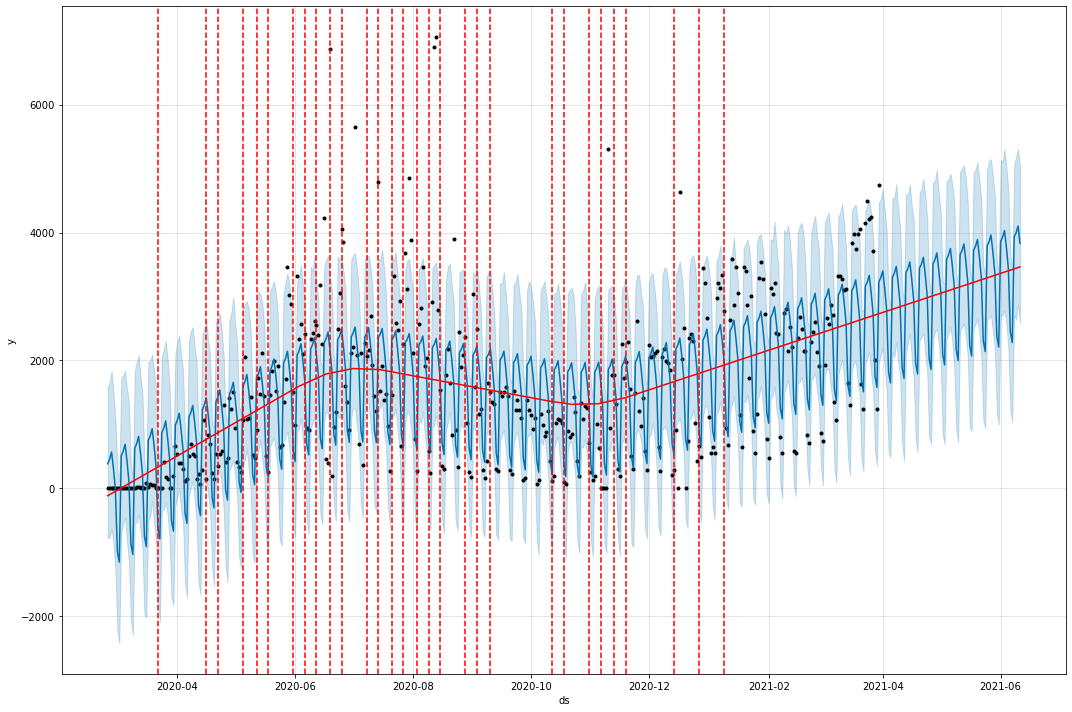

In [125]:
# Plot
fig = modelo.plot(previsao, figsize=(15,10))
a = add_changepoints_to_plot(fig.gca(),modelo, previsao)

# Desafio 11: Identificar potenciais changepoints.

In [126]:
df_sp['taxa_casos'] = df_sp['casos_novos'].diff()
df_sp['taxa_obitos'] = df_sp['obitos_novos'].diff()

<AxesSubplot:xlabel='datahora', ylabel='taxa_casos'>

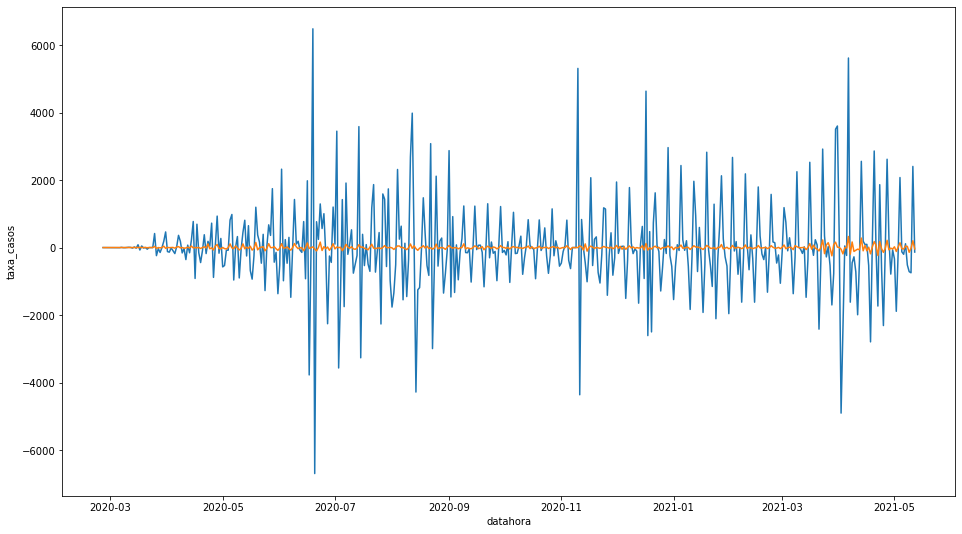

In [127]:
sns.lineplot(x = 'datahora', y = 'taxa_casos', data = df_sp)
sns.lineplot(x = 'datahora', y = 'taxa_obitos', data = df_sp)

Nota-se que no início de Maio o número de casos começa aumentar de forma acentuda, tendo seu pico no final de junho e então volta a cair.

Também percebe-se um aumento nos casos no final do ano de 2020 que oscila bastante a té março, onde tem um novo pico.

In [128]:
# Criando e treinando o modelo
modelo = Prophet(n_changepoints=30, changepoint_prior_scale = 1)
modelo.fit(profeta)

# Fazendo as previsões
previsto = modelo.make_future_dataframe(periods=43)
previsto = modelo.predict(previsto)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


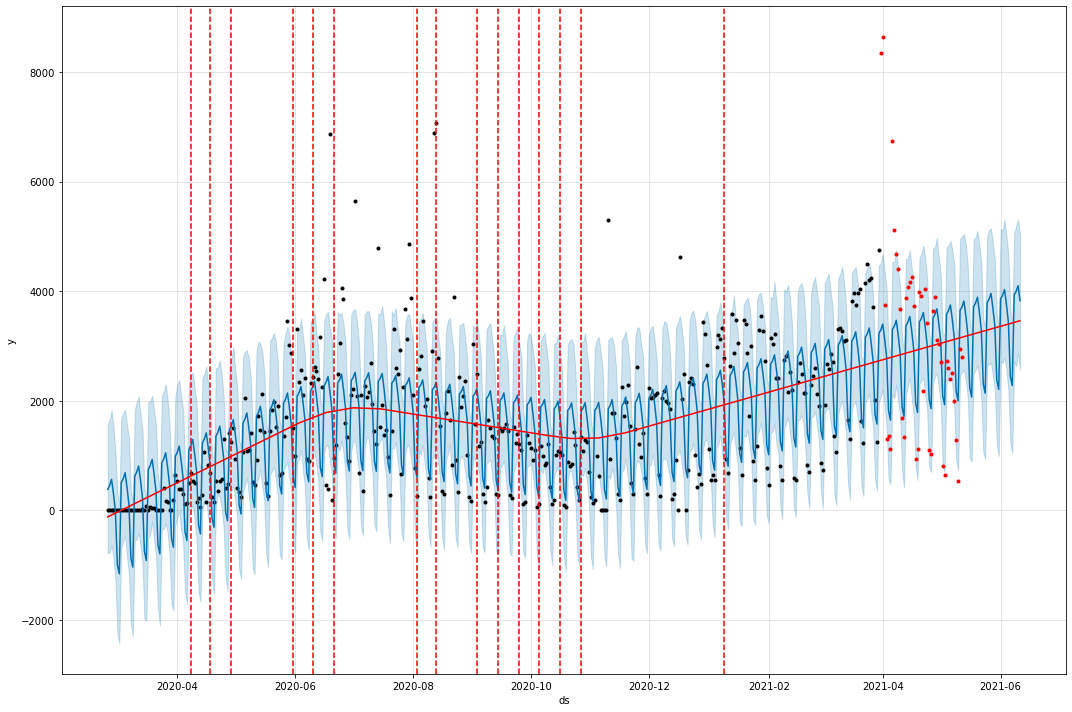

In [129]:
# Plot
fig = modelo.plot(previsao, figsize=(15,10))
plt.plot(df_teste['ds'],df_teste['y'],'.r')
a = add_changepoints_to_plot(fig.gca(),modelo, previsao)

Os change points estão bem próximos com o que foi observado anteriormente, logo, o aumento do número de change points ou da alteração da escala não trouxe muitas vantagens já que os dados apresentam pouca variação no curto prazo, sendo mais interessante olhar de forma mais espaçada.

# Desafio 12: Desenvolver uma função roda o modelo automaticamente.

In [130]:
def modelo_profeta(data, periodo_previsao, change_points, scale):

    # Preparando os dados
    profeta = pd.DataFrame()
    profeta['ds'] = df_sp['datahora'][:data.shape[0]-periodo_previsao]
    profeta['y'] = df_sp['casos_novos'][:data.shape[0]-periodo_previsao]

    df_teste = pd.DataFrame()
    df_teste['ds'] = df_sp['datahora'][data.shape[0]-periodo_previsao:]
    df_teste['y'] = df_sp['casos_novos'][data.shape[0]-periodo_previsao:]    
    
    
    # Criando e treinando o modelo
    modelo = Prophet(n_changepoints=change_points, changepoint_prior_scale = scale)
    modelo.fit(profeta)

    # Fazendo as previsões
    previsto = modelo.make_future_dataframe(periods=periodo_previsao)
    previsto = modelo.predict(previsto)

    return modelo, previsto


In [131]:
modelo, previsao = modelo_profeta(df,43,50,1)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


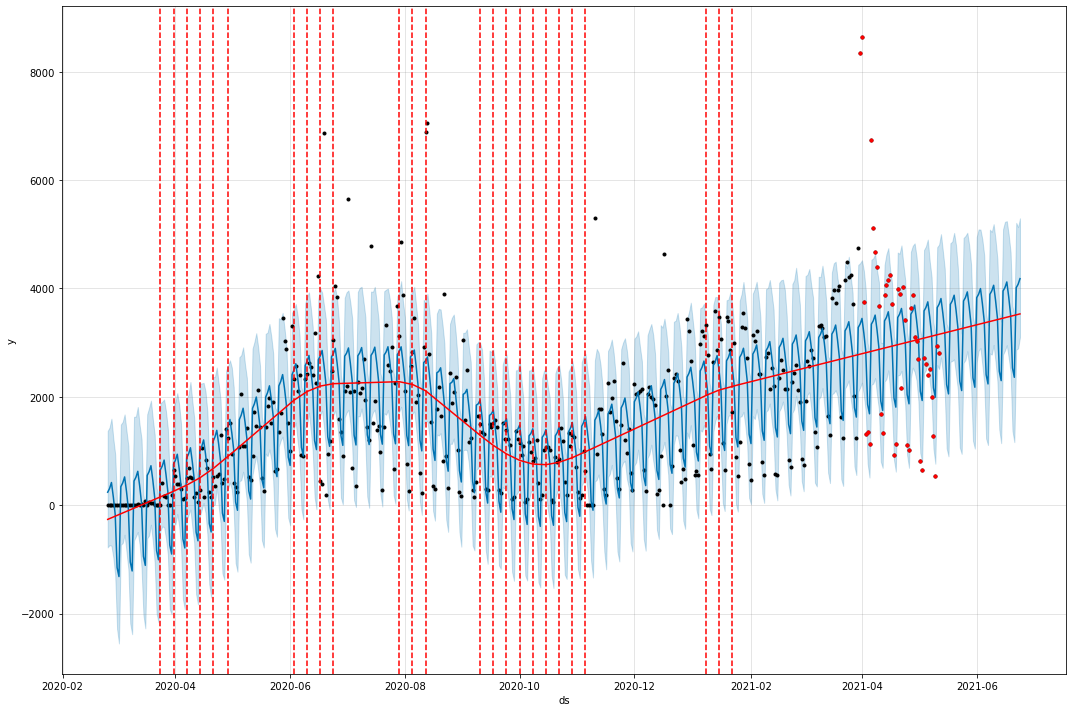

In [132]:
# Plot
fig = modelo.plot(previsao, figsize=(15,10))
plt.plot(df_teste['ds'],df_teste['y'],'.r')
a = add_changepoints_to_plot(fig.gca(),modelo, previsao)
